In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import sklearn.preprocessing

from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error

import opendatasets as od

Data Source: https://www.kaggle.com/subhaskumarray/spotify-tracks-data

In [5]:
df = pd.read_csv(r'/Users/malachihale/codeup-data-science/End-to-End-Project/tracks.csv')

In [6]:
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [7]:
len(df)

586672

In [8]:
df[df.release_date == df.release_date.max()].head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
86695,0usLN2VpccZQwWkGLm3Odm,2013 Will Be My Year,0,161045,0,['Jay and Others :>'],['3pwVqfe1xCnGTTnbVjYf74'],2021-04-16,0.347,0.965,10,-6.014,1,0.1420,0.05040,0.000000,0.3430,0.392,90.987,4
92864,1Nlstdx5q4GVUyaQqHYvqh,Inner City Life - 2020 Remaster,0,422183,0,['Goldie'],['2SYqJ3uDLLXZNyZdLKBy4M'],2021-04-16,0.384,0.889,7,-6.548,1,0.0936,0.00226,0.425000,0.0728,0.112,154.886,4
93915,4BvreMl8IerW37NLYtBZ9e,Blow Your Mind (Mwah),0,178583,0,['Dua Lipa'],['6M2wZ9GZgrQXHCFfjv46we'],2021-04-16,0.677,0.796,2,-4.761,0,0.1170,0.01880,0.000000,0.0948,0.494,108.851,4
93916,4K9PNGfQMYnMsY9zEDKDLC,Break My Heart,0,352453,0,"['Dua Lipa', 'Moodymann']","['6M2wZ9GZgrQXHCFfjv46we', '6pohviZSNRueSX7uNu...",2021-04-16,0.772,0.637,4,-7.846,0,0.0494,0.02200,0.035300,0.0898,0.409,113.022,4
93917,5xZAMT6xqi8sXUHcccwzK2,Love Again,0,258004,0,['Dua Lipa'],['6M2wZ9GZgrQXHCFfjv46we'],2021-04-16,0.659,0.667,11,-4.668,0,0.0339,0.00173,0.000029,0.1000,0.468,115.982,4


In [9]:
df[df.popularity == df.popularity.max()].head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.119,0.321,0.0,0.42,0.464,90.03,4


In [10]:
len(df[df.popularity == 0])

44690

In [11]:
len(df[df.popularity == 0])/len(df)

0.07617544385960127

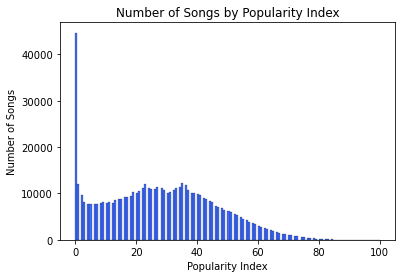

In [12]:
sns.set_palette('bright')
popularity = sns.histplot(x = df.popularity)
labels = popularity.set(ylabel = "Number of Songs", xlabel = "Popularity Index", title = "Number of Songs by Popularity Index")

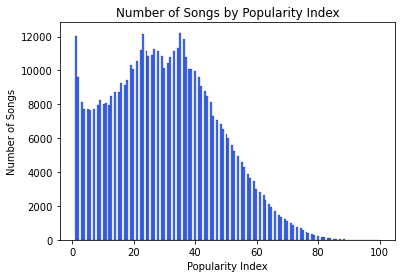

In [13]:
sns.set_palette('bright')
popularity = sns.histplot(x = df[df.popularity > 0].popularity)
labels = popularity.set(ylabel = "Number of Songs", xlabel = "Popularity Index", title = "Number of Songs by Popularity Index")

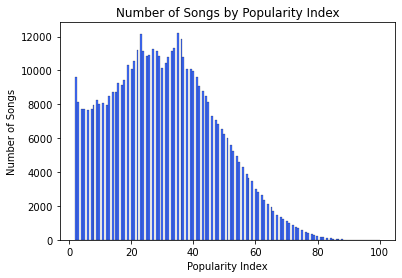

In [14]:
sns.set_palette('bright')
popularity = sns.histplot(x = df[df.popularity > 1].popularity)
labels = popularity.set(ylabel = "Number of Songs", xlabel = "Popularity Index", title = "Number of Songs by Popularity Index")

In [15]:
df[df.popularity > 90]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
91866,60ynsPSSKe6O3sfwRnIBRf,Streets,94,226987,1,['Doja Cat'],['5cj0lLjcoR7YOSnhnX0Po5'],2019-11-07,0.749,0.463,11,-8.433,1,0.0828,0.20800,0.037100,0.3370,0.1900,90.028,4
91867,6UelLqGlWMcVH1E5c4H7lY,Watermelon Sugar,92,174000,0,['Harry Styles'],['6KImCVD70vtIoJWnq6nGn3'],2019-12-13,0.548,0.816,0,-4.209,1,0.0465,0.12200,0.000000,0.3350,0.5570,95.390,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.6440,118.051,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.5530,83.970,4
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.3340,171.005,4
92814,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],2020-09-16,0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.2350,120.031,4
92816,3FAJ6O0NOHQV8Mc5Ri6ENp,Heartbreak Anniversary,94,198371,0,['Giveon'],['4fxd5Ee7UefO4CUXgwJ7IP'],2020-03-27,0.449,0.465,0,-8.964,1,0.0791,0.52400,0.000001,0.3030,0.5430,89.087,3
92817,27OeeYzk6klgBh83TSvGMA,WITHOUT YOU,94,161385,1,['The Kid LAROI'],['2tIP7SsRs7vjIcLrU85W8J'],2020-11-06,0.662,0.413,0,-7.357,1,0.0299,0.21300,0.000000,0.1340,0.4670,93.005,4
92819,1xK1Gg9SxG8fy2Ya373oqb,Bandido,94,232853,0,"['Myke Towers', 'Juhn']","['7iK8PXO48WeuP03g8YR51W', '2LmcxBak1alK1bf7d1...",2020-12-10,0.713,0.617,8,-4.637,1,0.0887,0.12200,0.000000,0.0962,0.6820,168.021,4
92821,2XIc1pqjXV3Cr2BQUGNBck,LA NOCHE DE ANOCHE,93,203201,0,"['Bad Bunny', 'ROSALÍA']","['4q3ewBCX7sLwd24euuV69X', '7ltDVBr6mKbRvohxhe...",2020-11-27,0.856,0.618,7,-4.892,1,0.2860,0.03030,0.000000,0.0866,0.3910,81.993,4


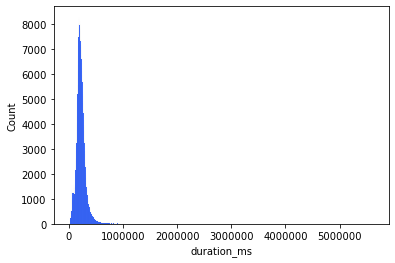

In [16]:
duration = sns.histplot(df.duration_ms)
duration.ticklabel_format(useOffset=False, style='plain')


In [17]:
df.sort_values(by = 'duration_ms', ascending = False).head(10)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
326329,3EEv9UCeZdn4MVFv8tsO1E,โครงสร้างแห่งสิ่งที่เรียกว่าชีวิต,3,5621218,0,['ท่านพุทธทาส'],['2ySk9zib3PuomvMGmCqdTA'],1979-07-28,0.638,0.537000,8,-13.365,1,0.7750,0.82500,0.00000,0.345,0.401,131.446,3
450241,7foc25ig7dibxvULPU2kBG,Brown Noise - 90 Minutes,50,5403500,0,['Sound Dreamer'],['4YJlpG8fCq38GnS8ElByiF'],2013-06-05,0.000,0.000099,2,-21.669,1,0.0000,0.11100,0.39200,0.137,0.000,0.000,0
131876,6rGikpwOv3LXaHWVCYbMNC,New Year's Eve 2015 Party Hits - Full DJ Party...,0,5042185,0,['Various Artists'],['0LyfQWJT6nXafLPZqxe9Of'],2014-12-19,0.457,0.891000,11,-4.596,0,0.0627,0.00467,0.00109,0.294,0.731,129.516,4
586457,7jTxNjSwPcPjSbK8829Vno,Surah Al-Araf,39,4995083,0,['Sheikh Mishary Rashid Alfasay'],['6nd2oiKSu9ksEAMzpXjIyi'],2010-01-01,0.426,0.249000,11,-7.202,1,0.0301,0.91000,0.00000,0.143,0.400,134.168,3
399471,7r86YmJo79FRcAHuVeKZp8,Tech House The Yearbook 2018 - Continuous Mix 2,0,4864333,0,['Monoteque'],['1w3ov1Em1iYnTpAh3pIbOf'],2018-12-16,0.691,0.639000,1,-10.181,1,0.0486,0.00424,0.72100,0.116,0.157,124.545,4
83501,28ci4OQnXnVyOJJjqNTza1,6 Years of 1980 Recordings - Part 2 - 2010-201...,0,4800118,0,['Dan McKie'],['5x6OZlUVGFX4F1QHJCgysn'],2013-01-28,0.751,0.807000,7,-7.129,1,0.0510,0.00257,0.51900,0.102,0.190,127.006,4
405153,3PmwiLyD0yPI63SsglmPN5,Surah An-Nisa,43,4797258,0,['Sheikh Mishary Rashid Alfasay'],['6nd2oiKSu9ksEAMzpXjIyi'],2010-01-01,0.408,0.258000,0,-8.920,1,0.0311,0.91600,0.00000,0.197,0.437,143.346,3
84493,3IG9msuvoyDjJlt2DL0ZIn,Monster Tunes Yearmix 2011 - Mixed by Mark Eteson,0,4792587,0,['Mark Eteson'],['6vwohTnFjRH2dQCZd32eSB'],2011-12-19,0.317,0.914000,11,-6.233,0,0.0489,0.00158,0.54600,0.129,0.108,137.075,4
86769,2nmbfiPT5diWNsfetpYAow,Digital Punk: Unleashed The 2013 Yearmix CD 1 ...,1,4786672,0,['Various Artists'],['0LyfQWJT6nXafLPZqxe9Of'],2013-12-15,0.468,0.947000,5,-4.575,0,0.1140,0.01280,0.00241,0.902,0.121,153.068,4
158668,6ZryuGcNCvBNTVt3cL76VN,Alltum Yearmix 2019 - mixed by John Clarcq,0,4775518,0,['John Clarcq'],['2BqsWXdFTpzzm1soINL0bC'],2019-12-20,0.488,0.847000,7,-7.627,1,0.0459,0.01660,0.71700,0.694,0.165,126.819,4


The longest song is over 93 minutes long!

In [18]:
df.duration_ms.mean()

230051.16728597923

The average song if 3.8 minutes long.

In [19]:
df.duration_ms.median()

214893.0

The median song if 3.58 minutes long.

In [20]:
df.sort_values(by = 'duration_ms', ascending = False).tail(20)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
107062,0eygsvCA2CLqAz3UMbFahW,Hear it grow,0,6373,0,['Underground Sound Of Lisbon'],['1KLufL4OUQFuzqaD3hSQ5u'],2006-06-13,0.0,0.327,1,-25.776,1,0.0,0.105000,0.000,0.0,0.0,0.0,0
107044,3RNVzA6VcMkIii2Gn0vFq6,Hear It Grow,0,6373,0,['Underground Sound Of Lisbon'],['1KLufL4OUQFuzqaD3hSQ5u'],1998-02-26,0.0,0.327,1,-25.776,1,0.0,0.105000,0.000,0.0,0.0,0.0,0
352701,4A2ljLdaDYg6N4HXzxJhbn,Spectacle - Live 2019,0,6373,0,['The Dark Tenor'],['2GIKcsT0xfsxpYUZ5yX2tL'],2019-10-11,0.0,0.951,5,-1.957,1,0.0,0.000003,0.990,0.0,0.0,0.0,0
12627,523qs4UcGlQ6ycdha1VGqs,Pause Track - Live,0,6362,0,['Benny Goodman'],['1pBuKaLHJlIlqYxQQaflve'],1938,0.0,0.000,0,-60.000,0,0.0,0.000000,0.000,0.0,0.0,0.0,0
352696,3JPZ3f4LB9a1aw9HpDnVZ5,Kashmir - Live 2019,0,6360,0,['The Dark Tenor'],['2GIKcsT0xfsxpYUZ5yX2tL'],2019-10-11,0.0,0.772,2,-2.283,1,0.0,0.360000,0.836,0.0,0.0,0.0,0
12550,3IcXTeq9O2dpsSXsDj9naH,Pause Track - Live,0,5991,0,['Benny Goodman'],['1pBuKaLHJlIlqYxQQaflve'],1938,0.0,0.000,0,-60.000,0,0.0,0.000000,0.000,0.0,0.0,0.0,0
23359,0hr9kRUi2X4MXc72A4VxG4,Pause Track,0,5108,0,['Sarah Vaughan'],['1bgyxtWjZwA5PQlDsvs9b8'],1949,0.0,0.000,0,-60.000,0,0.0,0.000000,0.000,0.0,0.0,0.0,0
351929,00TfxQ0wUMHrHoXQsyY1O4,The Shortest Message (2015),0,4937,1,"['Todd Glass', 'Blake Wexler']","['3aiC120kJreSUV17GecXwP', '19boQkDEIay9GaVAWk...",2018-01-12,0.0,0.642,7,-8.020,1,0.0,0.955000,0.000,0.0,0.0,0.0,0
1460,35GlCW5aqb8iJAdLuUf7tF,Pause Track,0,4000,0,['Louis Armstrong'],['19eLuQmk9aCobbVDHc6eek'],1925,0.0,0.000,0,-60.000,0,0.0,0.000000,0.000,0.0,0.0,0.0,0
1291,1JUFU8XJRWgG9Ir8KlLvpW,Pause Track,0,4000,0,['Louis Armstrong'],['19eLuQmk9aCobbVDHc6eek'],1925,0.0,0.000,0,-60.000,0,0.0,0.000000,0.000,0.0,0.0,0.0,0


The shortest tracks are around 4 seconds.

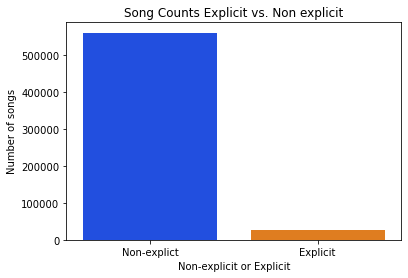

In [21]:
explicit = sns.countplot(df.explicit)
explicit.set_xticklabels(['Non-explict','Explicit'])
labels = explicit.set(ylabel = "Number of songs", xlabel = "Non-explicit or Explicit", title = "Song Counts Explicit vs. Non explicit")

In [22]:
df[['artists', 'id']].groupby('artists').count().sort_values(by = "id", ascending = False).head(20)

,id
artists,
['Die drei ???'],3856
['TKKG Retro-Archiv'],2006
['Benjamin Blümchen'],1503
['Bibi Blocksberg'],1472
['Lata Mangeshkar'],1373
['Bibi und Tina'],927
"['Tintin', 'Tomas Bolme', 'Bert-Åke Varg']",905
['Francisco Canaro'],891
['Ella Fitzgerald'],870


In [23]:
df['year_of_release'] = pd.to_datetime(df.release_date)

In [24]:
df['year_of_release'] = df['year_of_release'].dt.year

In [25]:
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year_of_release
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,1922
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,1922
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,1922
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,1922
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,1922


In [26]:
df.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'year_of_release'],
      dtype='object')

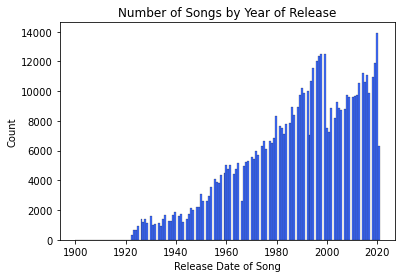

In [27]:
release_dates = sns.histplot(df.year_of_release)
labels = release_dates.set(xlabel = "Release Date of Song", title = "Number of Songs by Year of Release")

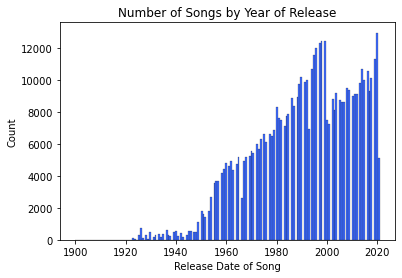

In [28]:
release_dates = sns.histplot(df[df.popularity > 0].year_of_release)
labels = release_dates.set(xlabel = "Release Date of Song", title = "Number of Songs by Year of Release")

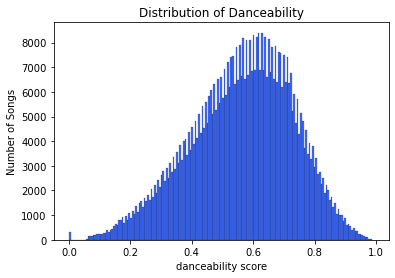

In [29]:
danceability = sns.histplot(df.danceability)
labels = danceability.set(xlabel = "danceability score", ylabel = "Number of Songs", title = "Distribution of Danceability")

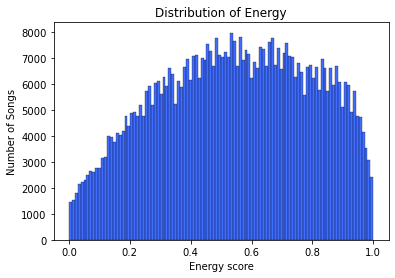

In [30]:
energy = sns.histplot(df.energy)
labels = energy.set(xlabel = "Energy score", ylabel = "Number of Songs", title = "Distribution of Energy")

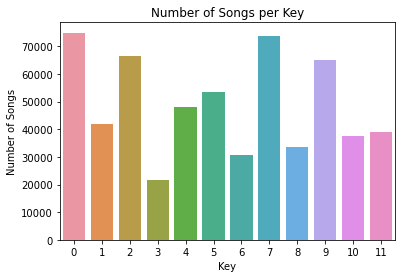

In [31]:
key = sns.countplot(df.key)
labels = key.set(xlabel = "Key", ylabel = "Number of Songs", title = "Number of Songs per Key")

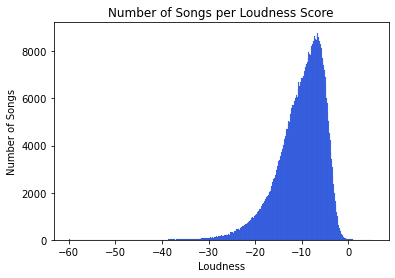

In [32]:
loudness = sns.histplot(df.loudness)
labels = loudness.set(xlabel = "Loudness", ylabel = "Number of Songs", title = "Number of Songs per Loudness Score")

In [33]:
df['mode']

0         1
1         1
2         1
3         1
4         0
         ..
586667    0
586668    1
586669    0
586670    1
586671    1
Name: mode, Length: 586672, dtype: int64

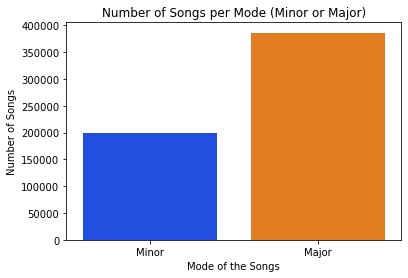

In [34]:
mode = sns.countplot(df['mode'])
mode.set_xticklabels(['Minor','Major'])
labels = mode.set(xlabel = "Mode of the Songs", ylabel = "Number of Songs", title = "Number of Songs per Mode (Minor or Major)")

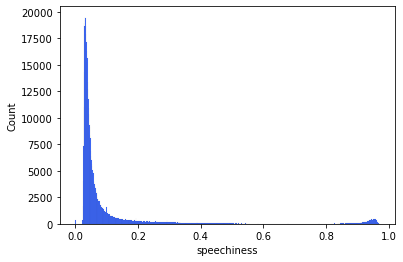

In [35]:
speechiness = sns.histplot(df['speechiness'])
labels = mode.set(xlabel = "Speechiness Score of the Songs", ylabel = "Number of Songs", title = "Number of Songs per Speechiness")

In [36]:
df[df.speechiness == df.speechiness.max()]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year_of_release
324123,4ucGpd15TTUybXsoS5mH9Q,"Wer die Nachtigall stört ..., Kapitel 1",12,361735,0,"['Harper Lee', 'Eva Mattes']","['3LckzrzeHnvOuErUOFlgyv', '5166OklcxPm89PCzel...",1960,0.603,0.214,...,-20.355,0,0.971,0.379,0.0,0.536,0.280,68.686,3,1960
482360,4dpSno2rYwlcdEtTzJxUjR,"Wer die Nachtigall stört ..., Kapitel 6",8,277171,0,"['Harper Lee', 'Eva Mattes']","['3LckzrzeHnvOuErUOFlgyv', '5166OklcxPm89PCzel...",1960,0.624,0.199,...,-20.685,0,0.971,0.334,0.0,0.166,0.285,71.491,5,1960
482422,1nbEqHuviTXtjbh4jei86V,"Wer die Nachtigall stört ..., Kapitel 98",6,274421,0,"['Harper Lee', 'Eva Mattes']","['3LckzrzeHnvOuErUOFlgyv', '5166OklcxPm89PCzel...",1960,0.606,0.182,...,-20.208,1,0.971,0.333,0.0,0.451,0.250,198.332,4,1960


In [37]:
df = df[df.speechiness < 0.971]

In [38]:
df[df.danceability == df.danceability.max()]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year_of_release
418558,4tq7Q9bTkLqzXNUi8PVmk2,Puisorul cafeniu,15,84707,0,['Malina Olinescu'],['6KZH1ER38F5smKpXKmLRwb'],2002-01-01,0.991,0.422,...,-11.093,1,0.247,0.307,0.0176,0.0788,0.994,119.975,4,2002


In [39]:
df[df.danceability == df.danceability.min()].head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year_of_release
817,2WTtJDfCUjAyCZHRSfCLDn,La Mina del Ford - Remasterizado,1,133947,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1924-03-29,0.0,0.0258,...,-24.894,1,0.0,0.996,0.768,0.0831,0.0,0.0,0,1924
1013,5tQsQaMquCXBREb1FNymi7,Oh Mujer Mujer - Remasterizado,0,170253,0,['Francisco Canaro'],['2maQMqxNnlRrBrS1oAsrX9'],1924-07-12,0.0,0.3150,...,-15.969,0,0.0,0.996,0.956,0.3750,0.0,0.0,0,1924
1043,6VweawuAyN9Ad9ikn9f5W3,Shangai Bay - Remasterizado,0,129027,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1924-03-29,0.0,0.0829,...,-24.272,1,0.0,0.996,0.893,0.1230,0.0,0.0,0,1924
1291,1JUFU8XJRWgG9Ir8KlLvpW,Pause Track,0,4000,0,['Louis Armstrong'],['19eLuQmk9aCobbVDHc6eek'],1925,0.0,0.0000,...,-60.000,0,0.0,0.000,0.000,0.0000,0.0,0.0,0,1925
1423,2fKnluaRpiiCFHWwKFkIgN,Pause Track,0,4000,0,['Louis Armstrong'],['19eLuQmk9aCobbVDHc6eek'],1925,0.0,0.0000,...,-60.000,0,0.0,0.000,0.000,0.0000,0.0,0.0,0,1925


[Text(0.5, 0, 'Acousticness Score'),
 Text(0.5, 1.0, 'Number of Songs by Acousticness')]

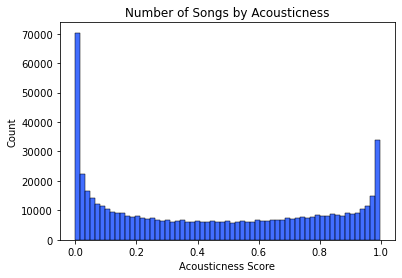

In [40]:
acousticness = sns.histplot(df.acousticness)
acousticness.set(xlabel = "Acousticness Score", title = "Number of Songs by Acousticness")

In [41]:
df[df.acousticness == df.acousticness.max()].head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year_of_release
9,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0,181173,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-29,0.548,0.0391,...,-23.228,1,0.1530,0.996,0.93300,0.1480,0.612,75.595,3,1922
18,0kCB1bDVBC8gWCFcnJyIZc,Ca C'est Une Chose,0,188000,0,['Victor Boucher'],['7vVR02JJYvsEAEPNHQMx0Q'],1922,0.352,0.3340,...,-13.038,1,0.0594,0.996,0.00746,0.3600,0.414,76.403,4,1922
20,0pXUGQcBxfoQXg2e7G9Wwk,Ta Bouche,0,180933,0,['Jeanne Saint Bonnet'],['4ZACxcKyd37u9WSxCAvLP2'],1922,0.335,0.3040,...,-14.062,1,0.0506,0.996,0.08320,0.1020,0.215,76.576,3,1922
31,1HJRj2XztAhgO7dLBw6b7s,El Patotero Sentimental - Remasterizado,0,145627,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-29,0.482,0.0283,...,-23.414,0,0.0732,0.996,0.77000,0.0989,0.330,77.642,4,1922
38,1PGLk4jyXA8oWTBtMyYlwX,El Huerfano - Remasterizado,0,171013,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.462,0.1190,...,-20.938,0,0.0793,0.996,0.88000,0.0773,0.407,122.895,4,1922


In [42]:
df[df.acousticness == df.acousticness.min()].tail()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year_of_release
509395,1XR7ApuyNcFPwKZ1fdedxB,Box Fan White Noise Sleep Sounds,27,594750,0,['Sleep Easy Solutions'],['6nRPsA0mdVR846DyGGLkpD'],2015-03-15,0.0,0.0,...,-44.993,1,0.0,0.0,0.0,0.0,0.0,0.0,0,2015
543978,6XS1ZQRraiXCIvpE62MibU,Anniversary of World War III,15,96573,0,['The West Coast Pop Art Experimental Band'],['2z4eiJkDaXYCR9kv2UuSgz'],1968,0.0,0.0,...,-60.000,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1968
544308,3i4odY6RMwdUvC1DxNbknp,Fourth Stage (Silence),21,899053,0,"['OSHO', 'Chaitanya Hari Deuter']","['63Cd2A4y0kWaLw0yxYjo2F', '6ShqyafouDcEeQVmdV...",1979,0.0,0.0,...,-60.000,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1979
570480,3L5t2FtZ2CJilRlsO5x04P,Wus Geven Ist Geven,7,199693,0,['Connie Francis'],['3EY5DxGdy7x4GelivOjS2Q'],1960-01-01,0.0,0.0,...,-60.000,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1960
570482,7I5HGh3DPuiG0x17HpjUxX,Shein Vi Di Levone,9,124199,0,['Connie Francis'],['3EY5DxGdy7x4GelivOjS2Q'],1960-01-01,0.0,0.0,...,-60.000,0,0.0,0.0,0.0,0.0,0.0,0.0,0,1960


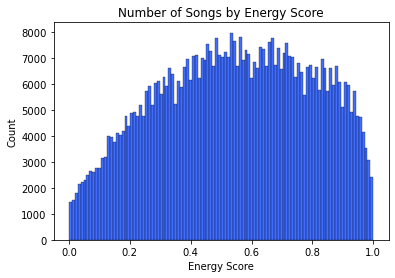

In [43]:
energy = sns.histplot(df.energy)
labels = energy.set(xlabel = "Energy Score", title = "Number of Songs by Energy Score")

In [44]:
df[df.energy == df.energy.max()].head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year_of_release
2353,2cODstPu4nOAIFfwnvNEwx,Moi J'fais Mes Coups En Dessous,0,190493,0,['Maurice Chevalier'],['3QXjI80udwDSEfxK5BjUXc'],1926,0.166,1.0,...,-4.373,0,0.0643,0.131,0.311,0.333,0.00001,116.707,3,1926
12240,6xYZrESY382GI6CcleGtps,I'm Bubbling Over (Reprise),0,79681,0,"['Condos Brothers', 'Ben Bernie & His Orchestra']","['6TcMKIvyZqLZOA2P0GrIaw', '5HOzq7et69WsiVJbZD...",1937-08-03,0.627,1.0,...,-9.253,1,0.2040,0.600,0.934,0.706,0.02780,116.150,4,1937
12336,3RFogvPJRYXVCv9qlotTKK,Applause; Transition Back to Goodman Orchestra...,6,41093,0,['Benny Goodman'],['1pBuKaLHJlIlqYxQQaflve'],1938,0.302,1.0,...,-22.887,0,0.0635,0.835,0.693,0.951,0.00001,98.839,4,1938
12341,4jmpeJO5XS9MukFzhARGrS,Applause; Benny Goodman's 'No Encore' Announce...,7,73933,0,['Benny Goodman'],['1pBuKaLHJlIlqYxQQaflve'],1938,0.244,1.0,...,-19.537,1,0.0972,0.880,0.889,0.403,0.00001,95.123,4,1938
12595,4MeVaz1Ki3nEofHif86bAd,Applause as Lionel Hampton Enters - Live,0,26640,0,['Benny Goodman'],['1pBuKaLHJlIlqYxQQaflve'],1938,0.305,1.0,...,-20.422,0,0.2370,0.315,0.717,0.366,0.00001,123.257,4,1938


In [45]:
len(df[df.instrumentalness == df.instrumentalness.max()])

22

In [46]:
len(df[df.instrumentalness == df.instrumentalness.min()])

205080

In [47]:
len(df[df.instrumentalness < .01])

440906

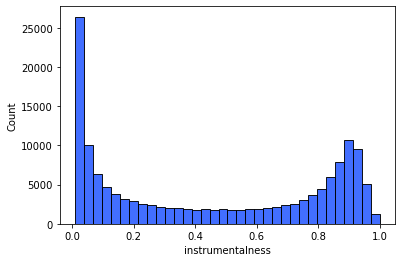

In [48]:
instrumentalness = sns.histplot(df[df.instrumentalness > 0.01].instrumentalness)

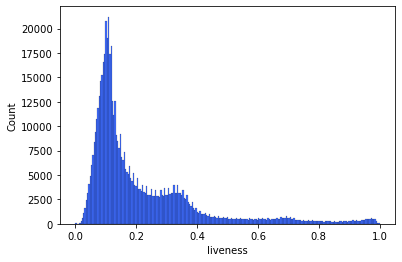

In [49]:
liveness = sns.histplot(df.liveness)

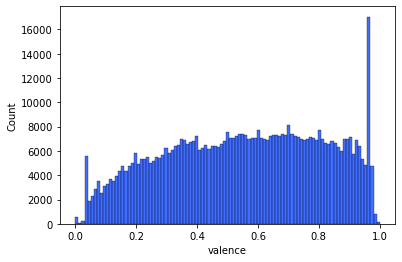

In [50]:
valence = sns.histplot(df.valence)

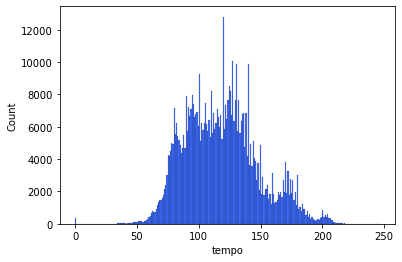

In [51]:
tempo = sns.histplot(df.tempo)

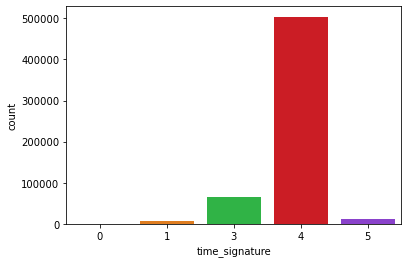

In [52]:
time_signature = sns.countplot(df.time_signature)

In [53]:
no_audiobook = df[df.instrumentalness > 0.01]

In [54]:
no_audiobook.sort_values(by = "speechiness", ascending = False).head(10)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year_of_release
123173,6DIXhfKEne8W8r9CLBNolF,"String Quartet No. 7 in F Major, Op. 59 No. 1:...",0,39789,0,"['Ludwig van Beethoven', 'Announcer, May 12, 1...","['2wOqMjp9TyABvtHdOSOTUS', '0ZE8MhaEwfsNs9Co8B...",1947,0.721,0.25500,...,-21.254,0,0.960,0.983,0.2830,0.207,0.666,71.146,4,1947
496009,0l0noIUp3waF1P5g7iRaA4,Kapitel 25 - als Bürgermeister (Folge 057),27,59114,0,['Benjamin Blümchen'],['1l6d0RIxTL3JytlLGvWzYe'],1987,0.769,0.31900,...,-17.890,0,0.958,0.178,0.0270,0.349,0.664,66.856,3,1987
578065,2F2gkIsSOsa0b89C6RsoDY,"Tintin i Tibet, del 48",19,66547,0,"['Tintin', 'Tomas Bolme', 'Bert-Åke Varg']","['6aMD1KAa5i3Myy61cR8FiW', '7HjbJ8V87zrxkSzL1K...",1978-07-17,0.670,0.73100,...,-11.886,1,0.958,0.905,0.0163,0.307,0.355,77.990,3,1978
296219,1zuhWOEUNADi9PWH1EPZqv,"Beethoven, Emotional Experience",1,108555,0,['George Bernard Shaw'],['4wgM6HLMl0kExNAT9aojv8'],1953,0.688,0.28700,...,-17.429,1,0.953,0.678,0.4770,0.203,0.482,77.474,3,1953
314327,6AO1K31s7fylR0BRQPNU0x,"6 Kleine Klavierstücke, Op. 19: No. 6, Sehr la...",8,82013,0,"['Arnold Schoenberg', 'Glenn Gould']","['5U827e4jbYz6EjtN0fIDt9', '13dkPjqmbcchm8cXjE...",1959,0.383,0.00107,...,-42.911,0,0.950,0.977,0.4630,0.228,0.000,74.216,4,1959
365348,5WWre8p1gcKcUaEGnvZH0y,Kız Çocuğu,17,53533,0,['Nazım Hikmet'],['42krV3deh1Ch9JLUFnegBn'],1991-10-31,0.603,0.24800,...,-15.593,1,0.950,0.994,0.3320,0.146,0.538,185.835,1,1991
296202,4WG85QPZyIXmLGl7u9K19L,"War, Nature, Divine Providence",3,157155,0,['George Bernard Shaw'],['4wgM6HLMl0kExNAT9aojv8'],1953,0.657,0.28700,...,-17.667,1,0.947,0.610,0.2890,0.299,0.465,82.084,4,1953
546129,0nv5UXtyyasDz1sGJekhhs,"Matrimonial Bureau Mailbag, 22 January 1935",0,902034,0,"['Norris Goff', 'Chester Lauck', 'Carlton Bric...","['3WCwCPDMpGzrt0Qz6quumy', '7vk8UqABg0Sga78GI3...",1935-01-22,0.718,0.20000,...,-18.451,1,0.946,0.994,0.0280,0.108,0.402,63.722,3,1935
197137,3EXFULIIJZYltLHNM7esfx,Vinotisidio,18,811653,0,"['Leopoldo Fernández', 'Anibal de Mar']","['1Ylw3nFeC5um9sy8jT276B', '4RzF6vST6rJdNYS0PE...",1997,0.628,0.41900,...,-12.711,1,0.945,0.994,0.0778,0.251,0.752,81.058,3,1997
9770,0uNv4IB4xDOWi6UNOuym0N,Pete Khele Pite Soi,0,185005,0,['Gramophone Club'],['1PucJ7tdNvyOgBCFfr4Kzi'],1935-12-31,0.687,0.23500,...,-20.496,1,0.944,0.988,0.3150,0.392,0.531,87.505,1,1935


## Train, Test, Split

In [55]:
def split_data(df):
    '''
    Splits data into train, validate, and test.
    '''
    #split data in train_and_validate_and_test
    train_and_validate, test = train_test_split(df, test_size=.12, random_state=123)
    #split train and validate datasets
    train, validate = train_test_split(train_and_validate, test_size=.12, random_state=123)

    return train, validate, test

In [56]:
train, validate, test = split_data(df)

We will scale loudness and duration

In [57]:
def add_scaled_columns(train, validate, test):
    '''
    Scales columns using min-max scaler.
    '''
    columns_to_scale = ['duration_ms', 'loudness']
    # new column names
    new_column_names = [c + '_scaled' for c in columns_to_scale]
    
    #Define scaler
    scaler_min_max = sklearn.preprocessing.MinMaxScaler()
    
    # Fit the scaler on the train
    scaler_min_max.fit(train[columns_to_scale])
    
    # transform train validate and test
    train = pd.concat([
        train,
        pd.DataFrame(scaler_min_max.transform(train[columns_to_scale]), columns=new_column_names, index=train.index),
    ], axis=1)
    
    validate = pd.concat([
        validate,
        pd.DataFrame(scaler_min_max.transform(validate[columns_to_scale]), columns=new_column_names, index=validate.index),
    ], axis=1)
    
    
    test = pd.concat([
        test,
        pd.DataFrame(scaler_min_max.transform(test[columns_to_scale]), columns=new_column_names, index=test.index),
    ], axis=1)
    
    return train, validate, test

In [58]:
train, validate, test = add_scaled_columns(train, validate, test)

In [59]:
train.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year_of_release,duration_ms_scaled,loudness_scaled
579293,6SDSBrb2sWdAaInkQ5lCLT,"Kapitel 1, del 17",15,62934,0,"['Tove Jansson', 'Mumintrollen', 'Mumin']","['0CXfq61wfiH7rvmJ7O0Ct4', '6SXUdE8lwqmLKPQgyG...",1985-03-01,0.714,0.109,...,0.9260,0.55200,0.00000,0.201,0.230,122.047,3,1985,0.010607,0.574645
417626,30BNWgT9ndwqF9fzhvHEcv,Sleepwalk (feat. R. Williams),28,318360,1,"['Christian Death', 'R.Williams']","['6mEohczxsctzkEIU0WAeWD', '1tBKuxis3aOLZA1BRT...",1984-03-01,0.267,0.862,...,0.0469,0.01480,0.00184,0.397,0.165,160.899,4,1984,0.056074,0.741618
347256,2og33yjHLFI4WmTw3AK06n,El tren,27,180973,0,['Teresa Rabal'],['5O9SEPgz10bQCeiIctR08i'],1987,0.681,0.860,...,0.3360,0.49900,0.00000,0.391,0.964,106.601,4,1987,0.031619,0.727132
550527,0DyfrmvuS4eZ6NSXUDpz1I,フーガ,23,181707,0,['UNICORN'],['0z4FY376uhecutd5Adph8s'],1990,0.521,0.911,...,0.0473,0.41900,0.00063,0.658,0.304,174.935,4,1990,0.031749,0.854702
394120,7L6ceM3HZMMRUPi8FZ1y0a,Dio è morto,24,173973,0,['Nomadi'],['2tk9K5rmPe05JFOzxbkfN9'],1992-06-24,0.782,0.757,...,0.0255,0.00765,0.00000,0.199,0.830,109.869,4,1992,0.030373,0.799315


In [60]:
train.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year_of_release,duration_ms_scaled,loudness_scaled
579293,6SDSBrb2sWdAaInkQ5lCLT,"Kapitel 1, del 17",15,62934,0,"['Tove Jansson', 'Mumintrollen', 'Mumin']","['0CXfq61wfiH7rvmJ7O0Ct4', '6SXUdE8lwqmLKPQgyG...",1985-03-01,0.714,0.109,...,0.9260,0.55200,0.00000,0.201,0.230,122.047,3,1985,0.010607,0.574645
417626,30BNWgT9ndwqF9fzhvHEcv,Sleepwalk (feat. R. Williams),28,318360,1,"['Christian Death', 'R.Williams']","['6mEohczxsctzkEIU0WAeWD', '1tBKuxis3aOLZA1BRT...",1984-03-01,0.267,0.862,...,0.0469,0.01480,0.00184,0.397,0.165,160.899,4,1984,0.056074,0.741618
347256,2og33yjHLFI4WmTw3AK06n,El tren,27,180973,0,['Teresa Rabal'],['5O9SEPgz10bQCeiIctR08i'],1987,0.681,0.860,...,0.3360,0.49900,0.00000,0.391,0.964,106.601,4,1987,0.031619,0.727132
550527,0DyfrmvuS4eZ6NSXUDpz1I,フーガ,23,181707,0,['UNICORN'],['0z4FY376uhecutd5Adph8s'],1990,0.521,0.911,...,0.0473,0.41900,0.00063,0.658,0.304,174.935,4,1990,0.031749,0.854702
394120,7L6ceM3HZMMRUPi8FZ1y0a,Dio è morto,24,173973,0,['Nomadi'],['2tk9K5rmPe05JFOzxbkfN9'],1992-06-24,0.782,0.757,...,0.0255,0.00765,0.00000,0.199,0.830,109.869,4,1992,0.030373,0.799315


In [61]:
train = train.set_index('id')

In [62]:
validate = validate.set_index('id')


In [63]:
test = test.set_index('id')

In [64]:
train.columns

Index(['name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'year_of_release',
       'duration_ms_scaled', 'loudness_scaled'],
      dtype='object')

### Adding Clusters

In [65]:
X_train = train[['explicit', 'danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature',
       'duration_ms_scaled', 'loudness_scaled', 'year_of_release']]
y_train = train['popularity']
X_validate = validate[['explicit', 'danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 
       'duration_ms_scaled', 'loudness_scaled', 'year_of_release']]
y_validate = validate.popularity
X_test = test[['explicit', 'danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature',
       'duration_ms_scaled', 'loudness_scaled', 'year_of_release']]
y_test = test.popularity

In [66]:
X_train.head()

,explicit,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms_scaled,loudness_scaled,year_of_release
id,,,,,,,,,,,,,,,
6SDSBrb2sWdAaInkQ5lCLT,0,0.714,0.109,5,0,0.9260,0.55200,0.00000,0.201,0.230,122.047,3,0.010607,0.574645,1985
30BNWgT9ndwqF9fzhvHEcv,1,0.267,0.862,9,0,0.0469,0.01480,0.00184,0.397,0.165,160.899,4,0.056074,0.741618,1984
2og33yjHLFI4WmTw3AK06n,0,0.681,0.860,11,1,0.3360,0.49900,0.00000,0.391,0.964,106.601,4,0.031619,0.727132,1987
0DyfrmvuS4eZ6NSXUDpz1I,0,0.521,0.911,0,1,0.0473,0.41900,0.00063,0.658,0.304,174.935,4,0.031749,0.854702,1990
7L6ceM3HZMMRUPi8FZ1y0a,0,0.782,0.757,4,1,0.0255,0.00765,0.00000,0.199,0.830,109.869,4,0.030373,0.799315,1992


## Select K Best Model

In [67]:
# Create model
kbest_6 = SelectKBest(f_regression, k=6)
#Fit the model
kbest_6.fit(X_train, y_train)
X_train.columns[kbest_6.get_support()]

Index(['explicit', 'energy', 'acousticness', 'instrumentalness',
       'loudness_scaled', 'year_of_release'],
      dtype='object')

In [68]:
# Create model
kbest_5 = SelectKBest(f_regression, k=5)
#Fit the model
kbest_5.fit(X_train, y_train)
X_train.columns[kbest_5.get_support()]

Index(['energy', 'acousticness', 'instrumentalness', 'loudness_scaled',
       'year_of_release'],
      dtype='object')

In [69]:
# Create model
kbest_4 = SelectKBest(f_regression, k=4)
#Fit the model
kbest_4.fit(X_train, y_train)
X_train.columns[kbest_4.get_support()]

Index(['energy', 'acousticness', 'loudness_scaled', 'year_of_release'], dtype='object')

In [70]:
# Create model
kbest_1 = SelectKBest(f_regression, k=1)
#Fit the model
kbest_1.fit(X_train, y_train)
X_train.columns[kbest_1.get_support()]

Index(['year_of_release'], dtype='object')

In [71]:
# Create model
kbest_7 = SelectKBest(f_regression, k=7)
#Fit the model
kbest_7.fit(X_train, y_train)
X_train.columns[kbest_7.get_support()]

Index(['explicit', 'danceability', 'energy', 'acousticness',
       'instrumentalness', 'loudness_scaled', 'year_of_release'],
      dtype='object')

In [72]:
# Create model
kbest_15 = SelectKBest(f_regression, k=15)
#Fit the model
kbest_15.fit(X_train, y_train)
X_train.columns[kbest_15.get_support()]

Index(['explicit', 'danceability', 'energy', 'key', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'duration_ms_scaled', 'loudness_scaled',
       'year_of_release'],
      dtype='object')

## Recursive Feature Elimination

In [73]:
rfe_6 = RFE(estimator=LinearRegression(), n_features_to_select=6)
rfe_6.fit(X_train, y_train)
X_train.columns[rfe_6.get_support()]

Index(['explicit', 'danceability', 'acousticness', 'valence',
       'duration_ms_scaled', 'loudness_scaled'],
      dtype='object')

In [74]:
rfe_7 = RFE(estimator=LinearRegression(), n_features_to_select=7)
rfe_7.fit(X_train, y_train)
X_train.columns[rfe_7.get_support()]

Index(['explicit', 'danceability', 'acousticness', 'instrumentalness',
       'valence', 'duration_ms_scaled', 'loudness_scaled'],
      dtype='object')

In [75]:
rfe_5 = RFE(estimator=LinearRegression(), n_features_to_select=5)
rfe_5.fit(X_train, y_train)
X_train.columns[rfe_5.get_support()]

Index(['explicit', 'danceability', 'acousticness', 'valence',
       'loudness_scaled'],
      dtype='object')

## Run Models

In [76]:
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)

In [77]:
X_train_model = X_train[['duration_ms_scaled', 'explicit', 'energy', 'danceability', 'acousticness', 'instrumentalness',
       'valence', 'loudness_scaled', 'year_of_release']]
X_validate_model = X_validate[['duration_ms_scaled', 'explicit', 'energy',  'danceability', 'acousticness', 'instrumentalness',
       'valence', 'loudness_scaled', 'year_of_release']]
X_test_model = X_test[['duration_ms_scaled', 'explicit', 'energy', 'danceability', 'acousticness', 'instrumentalness',
       'valence', 'loudness_scaled', 'year_of_release']]

### Baseline

In [78]:
# Predict taxvaluedollarcnt_pred_mean
popularity_pred_mean = y_train.popularity.mean()
y_train['popularity_pred_mean'] = popularity_pred_mean
y_validate['popularity_pred_mean'] = popularity_pred_mean

In [79]:
# compute taxvaluedollarcnt_pred_median
popularity_pred_median = y_train.popularity.median()
y_train['popularity_pred_median'] = popularity_pred_median
y_validate['popularity_pred_median'] = popularity_pred_median

In [80]:
y_train.head()

,popularity,popularity_pred_mean,popularity_pred_median
id,,,
6SDSBrb2sWdAaInkQ5lCLT,15,27.579759,27.0
30BNWgT9ndwqF9fzhvHEcv,28,27.579759,27.0
2og33yjHLFI4WmTw3AK06n,27,27.579759,27.0
0DyfrmvuS4eZ6NSXUDpz1I,23,27.579759,27.0
7L6ceM3HZMMRUPi8FZ1y0a,24,27.579759,27.0


In [81]:
y_validate.head()

,popularity,popularity_pred_mean,popularity_pred_median
id,,,
1hPcEUiJB8xDsuvGfhDQBO,13,27.579759,27.0
6AcS4QQkWYRc3pXJKVwrGJ,17,27.579759,27.0
1nx5ydj4WOEaoUMCwl7VOO,8,27.579759,27.0
0WBClBemYPJR44H6uIn0kp,47,27.579759,27.0
5cIU5GZBbyMfgfXGcoQVYc,54,27.579759,27.0


In [82]:
# RMSE of taxvaluedollarcnt_pred_mean
rmse_train = mean_squared_error(y_train.popularity, y_train.popularity_pred_mean) ** .5
rmse_validate = mean_squared_error(y_validate.popularity, y_validate.popularity_pred_mean) ** (1/2)
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# RMSE of taxvaluedollarcnt_pred_median
rmse_train = mean_squared_error(y_train.popularity, y_train.popularity_pred_median) ** .5
rmse_validate = mean_squared_error(y_validate.popularity, y_validate.popularity_pred_median) ** .5
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  18.37 
Validate/Out-of-Sample:  18.41
RMSE using Median
Train/In-Sample:  18.38 
Validate/Out-of-Sample:  18.42


### Build DataFrame

In [83]:
from sklearn.metrics import explained_variance_score

In [84]:
def make_metric_df(y, y_pred, model_name, metric_df):
    if metric_df.size ==0:
        metric_df = pd.DataFrame(data=[
            {
                'model': model_name, 
                'RMSE_validate': mean_squared_error(
                    y,
                    y_pred) ** .5,
                'r^2_validate': explained_variance_score(
                    y,
                    y_pred)
            }])
        return metric_df
    else:
        return metric_df.append(
            {
                'model': model_name, 
                'RMSE_validate': mean_squared_error(
                    y,
                    y_pred) ** .5,
                'r^2_validate': explained_variance_score(
                    y,
                    y_pred)
            }, ignore_index=True)

In [85]:
metric_df = pd.DataFrame()
metric_df = make_metric_df(y_validate.popularity,
                           y_validate.popularity_pred_median,
                           'median_baseline',
                          metric_df)

In [86]:
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,18.418735,0.0


### Linear Regression (OLS)

In [87]:
#Create the model object
lm_1 = LinearRegression(normalize=True)

# fit the model to training data
lm_1.fit(X_train, y_train.popularity)

y_train['popularity_pred_lm_1'] = lm_1.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.popularity, y_train.popularity_pred_lm_1) ** (1/2)

# predict validate
y_validate['popularity_pred_lm_1'] = lm_1.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.popularity, y_validate.popularity_pred_lm_1) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  14.51125020285666 
Validation/Out-of-Sample:  14.562674454447146


In [88]:
metric_df = metric_df.append({
    'model': 'OLS Regressor', 
    'RMSE_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.popularity, y_validate.popularity_pred_lm_1)}, ignore_index=True)

In [89]:
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,18.418735,0.000000
1,OLS Regressor,14.562674,0.373989


In [90]:
#Create the model object
lm_1_model = LinearRegression(normalize=True)

# fit the model to training data
lm_1_model.fit(X_train_model, y_train.popularity)

y_train['popularity_pred_lm_1_model'] = lm_1_model.predict(X_train_model)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.popularity, y_train.popularity_pred_lm_1_model) ** (1/2)

# predict validate
y_validate['popularity_pred_lm_1_model'] = lm_1_model.predict(X_validate_model)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.popularity, y_validate.popularity_pred_lm_1_model) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  14.526737940465008 
Validation/Out-of-Sample:  14.58311432174542


In [91]:
metric_df = make_metric_df(y_validate.popularity, y_validate.popularity_pred_lm_1_model,
               'OLS Regressor, Select Features',
               metric_df)

In [92]:
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,18.418735,0.000000
1,OLS Regressor,14.562674,0.373989
2,"OLS Regressor, Select Features",14.583114,0.372231


### LassoLars

In [93]:

# create the model object
lars = LassoLars(alpha=1)

# fit the model to our training data.
lars.fit(X_train, y_train.popularity)

# predict train
y_train['popularity_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.popularity, y_train.popularity_pred_lars) ** (1/2)

# predict validate
y_validate['popularity_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.popularity, y_validate.popularity_pred_lars) ** (1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  18.371024750622162 
Validation/Out-of-Sample:  18.405828608085848


In [94]:
metric_df = make_metric_df(y_validate.popularity, y_validate.popularity_pred_lars,
               'lasso_alpha_1',
               metric_df)

In [95]:
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,18.418735,0.000000
1,OLS Regressor,14.562674,0.373989
2,"OLS Regressor, Select Features",14.583114,0.372231
3,lasso_alpha_1,18.405829,0.000000


### Tweedie Regressor

In [96]:

# create the model object
glm = TweedieRegressor(power=1, alpha=0.5)


# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train_model, y_train.popularity)

# predict train
y_train['popularity_pred_glm'] = glm.predict(X_train_model)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.popularity, y_train.popularity_pred_glm) ** (1/2)

# predict validate
y_validate['popularity_pred_glm'] = glm.predict(X_validate_model)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.popularity, y_validate.popularity_pred_glm) ** (1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0.5\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0.5
Training/In-Sample:  18.371024750622162 
Validation/Out-of-Sample:  18.405828608085848


In [97]:
metric_df = make_metric_df(y_validate.popularity, y_validate.popularity_pred_glm,
               'GLM',
               metric_df)
metric_df


,model,RMSE_validate,r^2_validate
0,median_baseline,18.418735,0.000000
1,OLS Regressor,14.562674,0.373989
2,"OLS Regressor, Select Features",14.583114,0.372231
3,lasso_alpha_1,18.405829,0.000000
4,GLM,18.405829,0.000000


### Linear Regression Second Degree

In [98]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_model)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate_model)
X_test_degree2 =  pf.transform(X_test_model)

In [99]:

# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.popularity)

# predict train
y_train['popularity_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.popularity, y_train.popularity_pred_lm2) ** (1/2)

# predict validate
y_validate['popularity_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.popularity, y_validate.popularity_pred_lm2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  14.11655049526566 
Validation/Out-of-Sample:  201.2434371118253


In [100]:

metric_df = make_metric_df(y_validate.popularity, y_validate.popularity_pred_lm2,
               'quadratic',
               metric_df)

In [101]:
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,18.418735,0.000000
1,OLS Regressor,14.562674,0.373989
2,"OLS Regressor, Select Features",14.583114,0.372231
3,lasso_alpha_1,18.405829,0.000000
4,GLM,18.405829,0.000000
5,quadratic,14.186030,0.405944


### Linear Regression Third Degree

In [102]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=3)

# fit and transform X_train_scaled
X_train_degree3 = pf.fit_transform(X_train_model)

# transform X_validate_scaled & X_test_scaled
X_validate_degree3 = pf.transform(X_validate_model)
X_test_degree3 =  pf.transform(X_test_model)

In [103]:

# create the model object
lm3 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm3.fit(X_train_degree3, y_train.popularity)

# predict train
y_train['popularity_pred_lm3'] = lm3.predict(X_train_degree3)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.popularity, y_train.popularity_pred_lm3) ** (1/2)

# predict validate
y_validate['popularity_pred_lm3'] = lm3.predict(X_validate_degree3)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.popularity, y_validate.popularity_pred_lm3)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  13.835986485323273 
Validation/Out-of-Sample:  193.85024273269912


In [104]:
metric_df = make_metric_df(y_validate.popularity, y_validate.popularity_pred_lm3,
               'Third degree linear regression',
               metric_df)
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,18.418735,0.000000
1,OLS Regressor,14.562674,0.373989
2,"OLS Regressor, Select Features",14.583114,0.372231
3,lasso_alpha_1,18.405829,0.000000
4,GLM,18.405829,0.000000
5,quadratic,14.186030,0.405944
6,Third degree linear regression,13.923011,0.427771


### Linear Regression Fourth Degree

In [105]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=4)

# fit and transform X_train_scaled
X_train_degree4 = pf.fit_transform(X_train_model)

# transform X_validate_scaled & X_test_scaled
X_validate_degree4 = pf.transform(X_validate_model)
X_test_degree4 =  pf.transform(X_test_model)

In [106]:

# create the model object
lm4 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm4.fit(X_train_degree4, y_train.popularity)

# predict train
y_train['popularity_pred_lm4'] = lm4.predict(X_train_degree4)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.popularity, y_train.popularity_pred_lm4) ** (1/2)

# predict validate
y_validate['popularity_pred_lm4'] = lm4.predict(X_validate_degree4)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.popularity, y_validate.popularity_pred_lm4)

print("RMSE for Polynomial Model, degrees=4\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=4
Training/In-Sample:  13.635098722384733 
Validation/Out-of-Sample:  190.17707616758352


In [107]:
metric_df = make_metric_df(y_validate.popularity, y_validate.popularity_pred_lm4,
               'Fourth degree linear regression',
               metric_df)
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,18.418735,0.000000
1,OLS Regressor,14.562674,0.373989
2,"OLS Regressor, Select Features",14.583114,0.372231
3,lasso_alpha_1,18.405829,0.000000
4,GLM,18.405829,0.000000
5,quadratic,14.186030,0.405944
6,Third degree linear regression,13.923011,0.427771
7,Fourth degree linear regression,13.790470,0.438613


### Linear Regression Fifth Degree

In [108]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=5)

# fit and transform X_train_scaled
X_train_degree5 = pf.fit_transform(X_train_model)

# transform X_validate_scaled & X_test_scaled
X_validate_degree5 = pf.transform(X_validate_model)
X_test_degree5 =  pf.transform(X_test_model)

In [109]:
# create the model object
lm5 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm5.fit(X_train_degree5, y_train.popularity)

# predict train
y_train['popularity_pred_lm5'] = lm5.predict(X_train_degree5)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.popularity, y_train.popularity_pred_lm5) ** (1/2)

# predict validate
y_validate['popularity_pred_lm5'] = lm5.predict(X_validate_degree5)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.popularity, y_validate.popularity_pred_lm5)

print("RMSE for Polynomial Model, degrees=4\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=4
Training/In-Sample:  13.490454045143084 
Validation/Out-of-Sample:  198.3644763275535


In [110]:
metric_df = make_metric_df(y_validate.popularity, y_validate.popularity_pred_lm5,
               'Fifth degree linear regression',
               metric_df)
metric_df

,model,RMSE_validate,r^2_validate
0,median_baseline,18.418735,0.000000
1,OLS Regressor,14.562674,0.373989
2,"OLS Regressor, Select Features",14.583114,0.372231
3,lasso_alpha_1,18.405829,0.000000
4,GLM,18.405829,0.000000
5,quadratic,14.186030,0.405944
6,Third degree linear regression,13.923011,0.427771
7,Fourth degree linear regression,13.790470,0.438613
8,Fifth degree linear regression,14.084192,0.414441


In [111]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=4)

# fit and transform X_train_scaled
X_train_degree4 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree4 = pf.transform(X_validate)
X_test_degree4 =  pf.transform(X_test)

In [112]:
# create the model object
lm4 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm4.fit(X_train_degree4, y_train.popularity)

# predict train
y_train['popularity_pred_lm4_new'] = lm4.predict(X_train_degree4)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.popularity, y_train.popularity_pred_lm4) ** (1/2)

# predict validate
y_validate['popularity_pred_lm5_new'] = lm4.predict(X_validate_degree5)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.popularity, y_validate.popularity_pred_lm5_new)

print("RMSE for Polynomial Model, degrees=4\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3876 is different from 2002)

### Linear Regression Sixth Degree

In [ ]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=6)

# fit and transform X_train_scaled
X_train_degree6 = pf.fit_transform(X_train_model)

# transform X_validate_scaled & X_test_scaled
X_validate_degree6 = pf.transform(X_validate_model)
X_test_degree6 =  pf.transform(X_test_model)

In [ ]:
# create the model object
lm6 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm6.fit(X_train_degree6, y_train.popularity)

# predict train
y_train['popularity_pred_lm6'] = lm6.predict(X_train_degree6)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.popularity, y_train.popularity_pred_lm6) ** (1/2)

# predict validate
y_validate['popularity_pred_lm6'] = lm6.predict(X_validate_degree6)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.popularity, y_validate.popularity_pred_lm6)

print("RMSE for Polynomial Model, degrees=4\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

In [ ]:
metric_df = make_metric_df(y_validate.popularity, y_validate.popularity_pred_lm6,
               'Sixth degree linear regression',
               metric_df)
metric_df

Fifth degree linear regression is the optimum model.

### Out of Sample Evaluation

In [ ]:
y_test = pd.DataFrame(y_test)
y_test.head()

In [ ]:
# predict on test
y_test['popularity_pred_lm5'] = lm5.predict(X_test_degree5)

In [ ]:
# evaluate: rmse
rmse_test = mean_squared_error(y_test.popularity, y_test.popularity_pred_lm5)**(1/2)

print("RMSE for OLS Model using Fifth Degreee LinearRegression with Polynomial Regression\nOut-of-Sample Performance: ", rmse_test)

In [ ]:
y_test.head()


In [ ]:
plt.figure(figsize=(16,8))
plt.hist(y_test.popularity, color='lightblue', alpha=.5, label="Actual Tax Value Dollar Count")
plt.hist(y_test.popularity_pred_lm5, color='orange', alpha=.5, label="Model: LinearRegression, 3rd Degree Polynomial")
plt.xlabel("Popularity")
plt.ylabel("Number of Songs")
plt.title("Comparing the Distribution of Tax Value to Distributions of Predicted Tax Value")
plt.legend()
plt.show()